# Computação vetorizada com NumPy

Exemplo adaptado de Nicolas P. Rougier em [From Python to Numpy](http://www.labri.fr/perso/nrougier/from-python-to-numpy/)

## Random walk: solução OO

In [3]:
import random

#definição de classe
class RandomWalker:
    def __init__(self):
        self.position = 0
        self.path = []

    def step(self):
        self.position += random.choice([-1, 1])
        self.path.append(self.position)
    
    def walk(self, steps):
        for _ in range(steps):
            self.step()
        return self.path

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

/Users/rpinheir/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/rpinheir/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
walker = RandomWalker()
walker.walk(10)

[-1, -2, -3, -4, -3, -4, -3, -4, -5, -4]

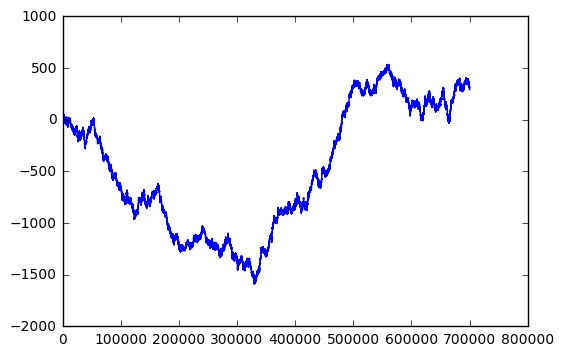

In [6]:
plt.plot(walker.walk(700000))
plt.show()

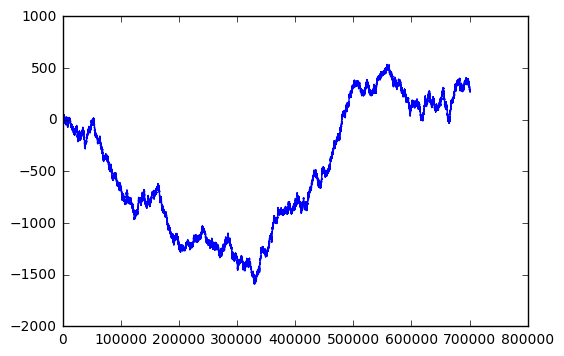

In [7]:

plt.plot(walker.walk(1000))
plt.show()

In [8]:
%magic # '%' significa line magic, normalmente afeta somente a próxima linha

In [9]:
%%timeit -n 1000 ## '%%' cel magic -- executará a próxima instrução 1000 vezes
walker.walk(1000)

1000 loops, best of 3: 1.79 ms per loop


### Random Walk: solução procedural

In [10]:
def random_walk(n):
    position = 0
    walk = [position]
    for i in range(n):
        position += random.choice([-1, 1])
        walk.append(position)
    return walk

In [11]:
%%timeit -n 1000
walk = random_walk(1000)

1000 loops, best of 3: 1.43 ms per loop


### Random Walk: solução vetorizada com `itertools`

In [12]:
from itertools import accumulate
g = accumulate([1,2,3,4,5])
g

In [13]:
next(g)

1

In [14]:
?random.choice

In [15]:
def random_walk_itertools(n):
    steps = np.random.choices([-1, 1], k = n)  # choice plural, Py ≥ 3.6
    return [0]+list(accumulate(steps))

In [16]:
%%timeit -n 1000
walk = random_walk_itertools(1000)

NameError: name 'np' is not defined

### Random Walk: solução vetorizada com NumPy

In [ ]:
import numpy as np
np.random.choice([-1, 1], 10)

In [ ]:
def random_walk_numpy(n):
    steps = np.random.choice([-1, 1], n)  # choice singular!
    return np.cumsum(steps)

In [ ]:
%%timeit -n 1000
walk = random_walk_numpy(1000)

In [ ]:
plt.plot(random_walk_numpy(1000))
plt.show()

## Comparando desempenhos

In [ ]:
from timeit import timeit

def cronometrar(expr, vezes=1000):
    return timeit(expr, globals=globals(), number=vezes) / vezes
     
casos = ['RandomWalker().walk(1000)',
          'random_walk(1000)',
          'random_walk_itertools(1000)',
          'random_walk_numpy(1000)',
         ]

In [ ]:
tempos = []
for caso in casos:
    t = cronometrar(caso)
    print(f'{t:07f}s', caso, sep='\t')
    tempos.append(t)

In [ ]:
fig, ax = plt.subplots()
posições = np.arange(len(casos))
ax.barh(posições, tempos)
ax.set_yticks(posições)
ax.set_yticklabels(casos)
plt.show()

## Aplicação vetorizada de fórmulas

Arremesso de um objeto com `v0 = 5m/s`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

v0 = 5
g = 9.81
t = np.linspace(0, 1, 1001)

y = v0 * t - g * t**2 / 2

plt.plot(t, y)
plt.xlabel('t (s)')
plt.ylabel('y (m)')
plt.show()

In [6]:
?y

## Referências

* [From Python to Numpy](http://www.labri.fr/perso/nrougier/from-python-to-numpy/) (veja também a [bibliografia](http://www.labri.fr/perso/nrougier/from-python-to-numpy/#bibliography) deste livro livre)
   
* StackExchange: [How do I move away from the “for-loop” school of thought?](https://softwareengineering.stackexchange.com/questions/254475/how-do-i-move-away-from-the-for-loop-school-of-thought)